#**Visão Geral do Projeto**
Este projeto teve como objetivo realizar uma análise aprofundada dos acidentes de trânsito ocorridos na cidade do Recife entre os anos de 2020 e 2022. Utilizando dados abertos da CTTU (Autarquia de Trânsito e Transporte Urbano do Recife), o estudo buscou identificar padrões, tendências e os principais fatores associados a essas ocorrências.

O trabalho foi estruturado em duas frentes principais:

**Análise Exploratória de Dados (EDA):** Nesta fase, os dados brutos de três anos distintos foram consolidados, limpos e tratados para garantir a qualidade e a consistência das informações. Foram investigados os bairros com maior número de acidentes, os dias da semana e horários de pico das ocorrências, os tipos de veículos mais envolvidos e a distribuição de vítimas, incluindo fatais. A análise também revelou o impacto de eventos externos, como a pandemia de COVID-19, que resultou em uma queda notável no número de acidentes a partir de março de 2020.

**Modelagem Preditiva:** Com os dados tratados e enriquecidos, o projeto avançou para a construção de um modelo de Machine Learning. O objetivo foi prever o número de vítimas em um determinado acidente com base em suas características (como localização, condições climáticas, tipo de veículo, etc.). Foram testados diferentes algoritmos de regressão, incluindo Ridge Regression, Random Forest e XGBoost. Após avaliação, o XGBoost foi selecionado como o mais performático e passou por um processo de otimização de hiperparâmetros (usando GridSearchCV) para maximizar sua capacidade preditiva.

O projeto combina, portanto, uma análise descritiva para gerar insights acionáveis com uma abordagem preditiva para criar uma ferramenta de classificação de risco, visando aprimorar a alocação de recursos e a formulação de políticas públicas de segurança no trânsito.

---

#**Conclusão**
Ao final deste projeto, foi possível extrair conclusões valiosas sobre a dinâmica dos acidentes de trânsito no Recife. A análise exploratória demonstrou que bairros como Boa Viagem concentram um volume significativamente alto de ocorrências, e que os dias úteis, especialmente no período da tarde, representam os momentos de maior risco. Além disso, automóveis e motocicletas são, de longe, os veículos com maior envolvimento nos acidentes registrados.

Na frente de modelagem, o modelo XGBoost Otimizado alcançou um coeficiente de determinação (R²) de 51%. Embora essa métrica indique que o modelo explica cerca de metade da variabilidade no número de vítimas, seu valor prático não deve ser subestimado. No contexto corporativo ou de gestão pública, um modelo com essa performance representa uma ferramenta poderosa, superando significativamente a ausência de um método de análise de risco ou a pura intuição.

Conclui-se que o modelo desenvolvido, mais do que prever um número exato, funciona como um eficaz sistema de triagem e priorização. Ele é capaz de analisar as características de um acidente em tempo real e atribuir um índice de gravidade, permitindo que as equipes de emergência (como SAMU e CTTU) otimizem o despacho de recursos para os eventos com maior potencial de gravidade.

Portanto, o projeto não apenas gerou um panorama detalhado dos acidentes na cidade, mas também entregou um produto de dados funcional com potencial para gerar impacto real na eficiência operacional e, em última instância, contribuir para a mitigação das consequências dos acidentes de trânsito no Recife.

In [1]:
from IPython.display import display, Markdown

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df20 = pd.read_csv('/content/acidentes_2020-novo.csv', sep= ';')
df21 = pd.read_csv('/content/acidentes2021.csv', sep= ';')
df22 = pd.read_csv('/content/acidentes2022.csv', sep= ';')

In [3]:
display(Markdown('###dataframe 2020'))
display(df20.head())
display(Markdown('###dataframe 2021'))
display(df21.head())
display(Markdown('###dataframe 2022'))
display(df22.head())

###dataframe 2020

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,2020-01-01,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,NaN,EM FRENTE A IGREJA UNIVERSAL,ÁGUA FRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,AV GENERAL SAN MARTIN,NaN,CORDEIRO,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,NaN,60 km/h,Dupla,Canteiro central,NaN,NaN
2,2020-01-01,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,AREIAS,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
3,2020-01-01,02:22:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,BOA VIAGEM,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,Única,Faixa seccionada,NaN,NaN
4,2020-01-01,03:33:00,SEM VÍTIMA,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,PAISSANDU,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,Faixa contínua,Faixa seccionada,Canteiro central


###dataframe 2021

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,2021-01-01,19:44:00,COM VÍTIMA,FINALIZADA,MADALENA,RUA BENFICA,NaN,NaN,EM FRENTE AO EXTRA NA SAIDA,MADALENA,...,Perfeito estado,Seca,Perfeito estado,Outros,Não há placas,NaN,Dupla,Faixa contínua,Faixa seccionada,NaN
1,2021-01-01,23:15:40,COM VÍTIMA,FINALIZADA,VÁRZEA,AV CAXANGA,NaN,RUA GASTAO VIDIGAL,EM FRENTE A UPA DA CAXANGA,VÁRZEA,...,Perfeito estado,Oleosa,Perfeito estado,Outros,Outras,NaN,Única,Não existe,NaN,NaN
2,2021-01-02,10:54:00,COM VÍTIMA,FINALIZADA,VASCO DA GAMA,RUA RESPLENDOR,353,NaN,AO LADO DO COLEGIO ADERBAL GALVÃO EM FRE...,VASCO DA GAMA,...,Incompleta,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
3,2021-01-02,11:13:00,COM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA VISCONDE DE JEQUITINHONHA,22,RUA CAPITAO ZUZINHA,RUA CAPITÃO ZUZINHA,BOA VIAGEM,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Outras,NaN,Única,Canal,NaN,NaN
4,2021-01-03,09:32:00,COM VÍTIMA,FINALIZADA,ILHA DO RETIRO,AV ENGENHEIRO ABDIAS DE CARVALHO,365,NaN,EM FRENTE A LANCHONETE COXINHAS DE BATATA,ILHA DO RETIRO,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Outras,60 km/h,Dupla,Faixa contínua,Faixa seccionada,Canteiro central


###dataframe 2022

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,"202200001,0",2022-01-01,NaN,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,"130,0",NaN,NaN,...,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
1,"202200007,0",2022-01-01,NaN,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,LADO OPOSTO AO NÚMERO 4728,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
2,"202200025,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,CAXANGÁ,AV CAXANGA,NaN,NaN,PROX AO CRUZAMENTO DE SAN MARTIN E/F A IGREJA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"202200029,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,JOANA BEZERRA,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,ENFRENTE AO FORUM DE JOANA BEZERRA SENTIDO BOA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"202200082,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,AFLITOS,RUA MANUEL DE CARVALHO,"432,0",RUA CARNEIRO VILELA,PRÓX AO CAMPO DO NAUTICO,...,Perfeito estado,Seca,Perfeito estado,NaN,"Placas ""Pare""",NaN,Única,Faixa contínua,NaN,NaN


In [4]:
df22 = df22.drop(columns=['Protocolo'], axis=1)

df20.columns = df20.columns.str.lower().str.strip()
df21.columns = df21.columns.str.lower().str.strip()
df22.columns = df22.columns.str.lower().str.strip()

df = pd.concat([df20, df21, df22], ignore_index=True)

#**Análise e tratamento do dataframe**

In [5]:
df.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,natureza
0,2020-01-01,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,NaN,EM FRENTE A IGREJA UNIVERSAL,ÁGUA FRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,AV GENERAL SAN MARTIN,NaN,CORDEIRO,...,Seca,Perfeito estado,Faixa de pedestre,NaN,60 km/h,Dupla,Canteiro central,NaN,NaN,NaN
2,2020-01-01,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,AREIAS,...,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN,NaN
3,2020-01-01,02:22:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,BOA VIAGEM,...,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,Única,Faixa seccionada,NaN,NaN,NaN
4,2020-01-01,03:33:00,SEM VÍTIMA,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,PAISSANDU,...,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,Faixa contínua,Faixa seccionada,Canteiro central,NaN


In [6]:
print('Informações do dataframe: ')
df.info()
print('Valores nulos no dataframe: ')
df.isnull().sum()

Informações do dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   data                       9141 non-null   object
 1   hora                       6472 non-null   object
 2   natureza_acidente          6471 non-null   object
 3   situacao                   9140 non-null   object
 4   bairro                     9092 non-null   object
 5   endereco                   9118 non-null   object
 6   numero                     5119 non-null   object
 7   detalhe_endereco_acidente  3595 non-null   object
 8   complemento                8328 non-null   object
 9   bairro_cruzamento          9091 non-null   object
 10  num_semaforo               2375 non-null   object
 11  sentido_via                5910 non-null   object
 12  tipo                       8977 non-null   object
 13  descricao                  3988 non-

,0
data,0
hora,2669
natureza_acidente,2670
situacao,1
bairro,49
endereco,23
numero,4022
detalhe_endereco_acidente,5546
complemento,813
bairro_cruzamento,50


No dataframe existem colunas com dados não preenchidos e colunas com mais de 90% de valores nulos. Irei tirar essas colunas, pois elas não terão importância para minha análise. Além disso, tratarei os valores nulos das colunas categoricas e numéricas

In [7]:
colunas_numericas = ['numero', 'num_semaforo', 'auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros', 'vitimas', 'vitimasfatais', 'velocidade_max_via']

for col in colunas_numericas:     # Verificando se tem alguma letra ou caractere nos dados das colunas numéricas
  teste = df[col].value_counts(dropna=False)
  print(teste)

numero
NaN       4022
S/N         28
50          17
210         16
165         14
          ... 
1018,0       1
712,0        1
1296,0       1
1059,0       1
599,0        1
Name: count, Length: 2662, dtype: int64
num_semaforo
NaN      6766
52.0       15
37.0       13
58.0       13
75,0       12
         ... 
1,0         1
286,0       1
561,0       1
403,0       1
287,0       1
Name: count, Length: 1118, dtype: int64
auto
1.0    3432
1,0    1605
2.0    1571
0,0     696
0.0     646
NaN     608
2,0     311
3.0     166
3,0      46
4.0      38
5.0       7
4,0       5
5,0       5
6.0       3
9         1
7,0       1
Name: count, dtype: int64
moto
1.0    2847
NaN    2400
1,0    1541
0,0     985
0       946
2.0     272
2,0     141
3.0       6
3,0       2
4         1
Name: count, dtype: int64
ciclom
NaN    4073
0,0    2655
0      2361
1.0      38
1,0      14
Name: count, dtype: int64
ciclista
NaN    3940
0,0    2523
0      2229
1.0     298
1,0     144
2.0       4
2,0       2
3         1
Name: cou

Notei que nas colunas numéricas existem valores que estão com caracteres, como 60KM ou até os numeros com "," em vez de "."

In [8]:
def tratar_colunas_numericas(df, colunas_numericas):
    df_tratado = df.copy()

    for col in colunas_numericas:
        if col == 'velocidade_max_via':
            df_tratado[col] = df_tratado[col].astype(str).str.extract(r'(\d+)', expand=False)

        else:
            df_tratado[col] = df_tratado[col].astype(str).str.replace(',', '.')
            df_tratado[col] = df_tratado[col].apply(lambda x: re.sub(r'[^0-9.-]', '', x) if isinstance(x, str) else x)
            df_tratado[col] = df_tratado[col].replace('', np.nan)

        df_tratado[col] = pd.to_numeric(df_tratado[col], errors='coerce')

    return df_tratado

df = tratar_colunas_numericas(df, colunas_numericas)

In [9]:
def tratar_nulos(df):
    for col in df.columns:
        if df[col].isnull().sum() > 8000:
            df.drop(columns=col, inplace=True)

        elif df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].median())

        else:
            df[col] = df[col].fillna('Não informado')

    return df

df = tratar_nulos(df)

In [10]:
df['data'] = pd.to_datetime(df['data'])
df['hora'] = pd.to_datetime(df['hora'], errors='coerce').dt.time

df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia'] = df['data'].dt.day
df['dia_semana'] = df['data'].dt.dayofweek
df['hora_ocorrencia'] = pd.to_datetime(df['hora'], format='%H:%M:%S', errors='coerce').dt.hour

/tmp/ipython-input-10-2208169833.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['hora'], errors='coerce').dt.time


###**Verificando Outliers**

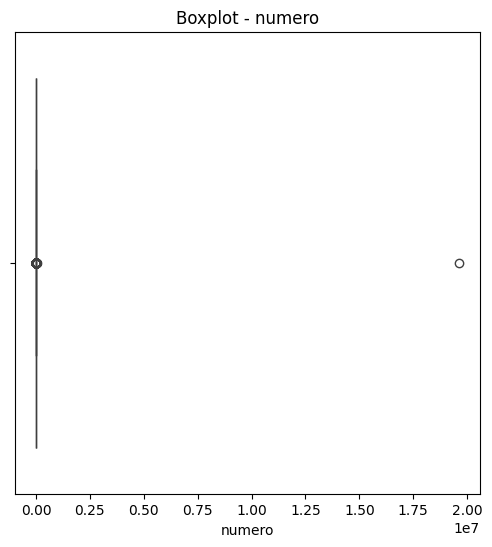

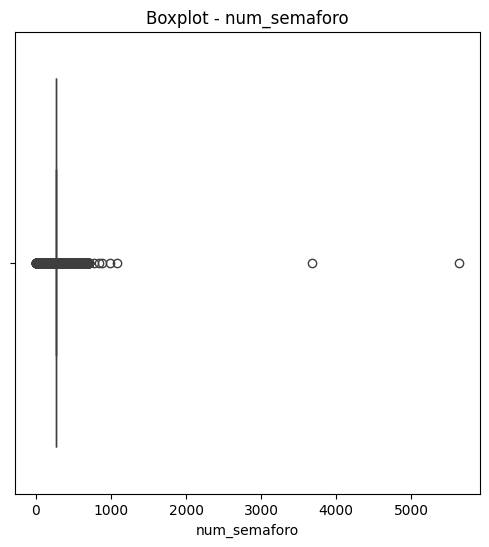

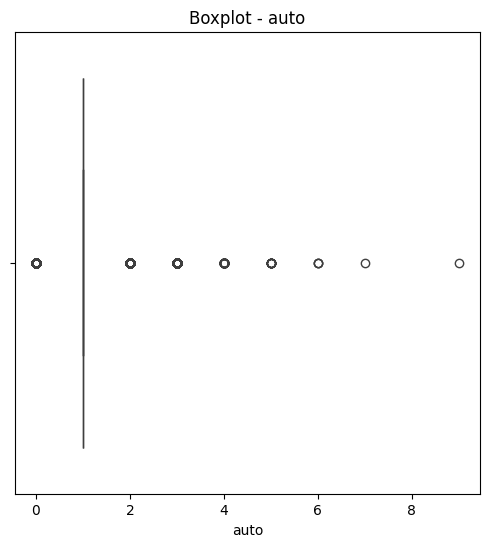

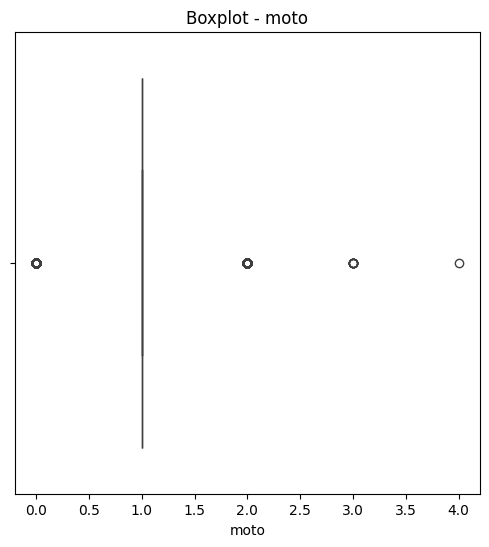

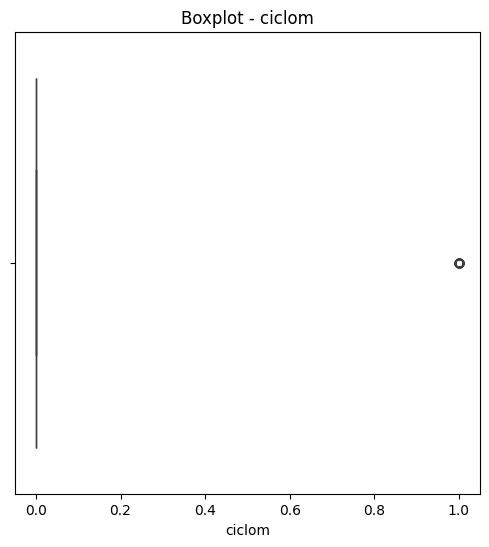

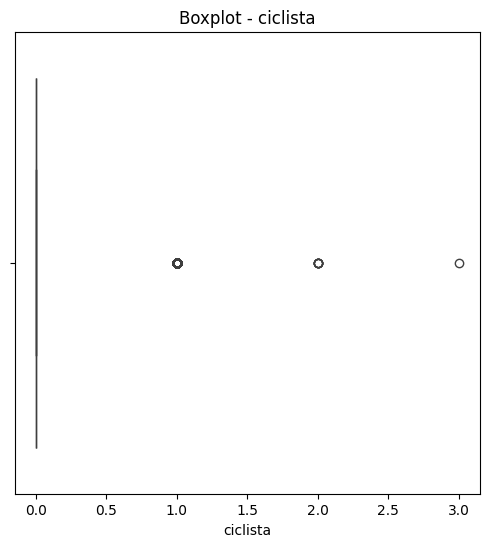

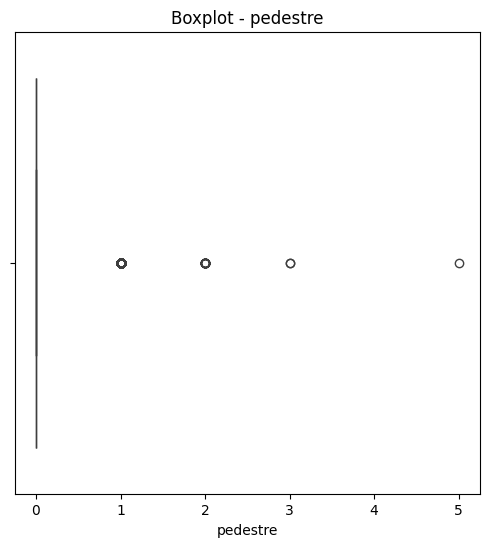

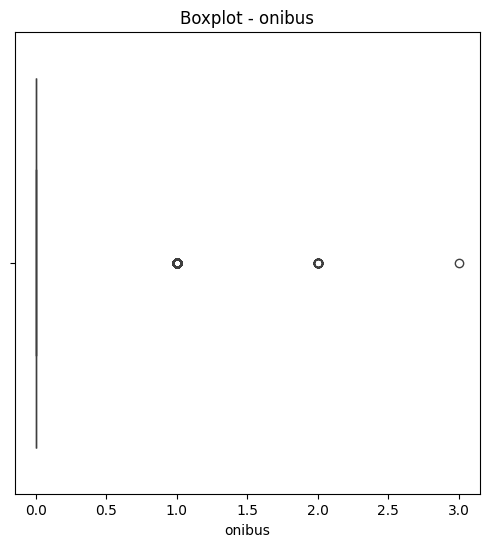

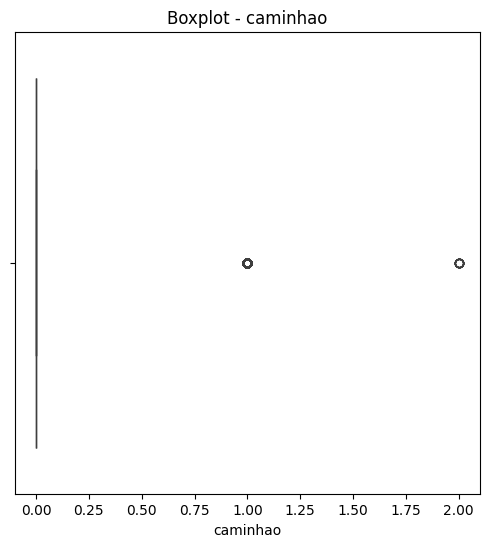

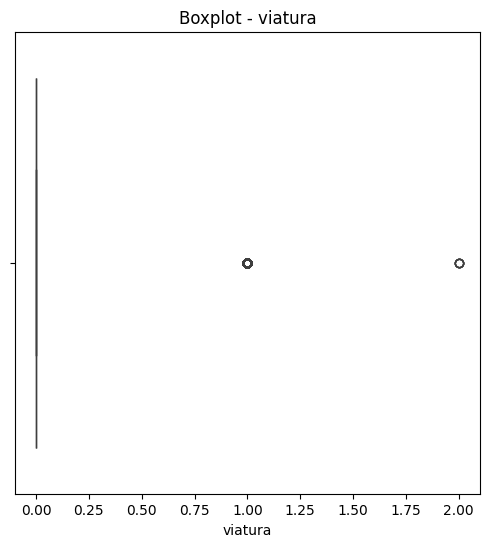

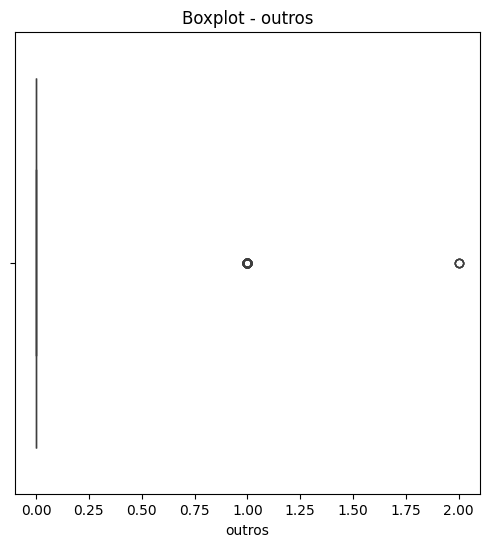

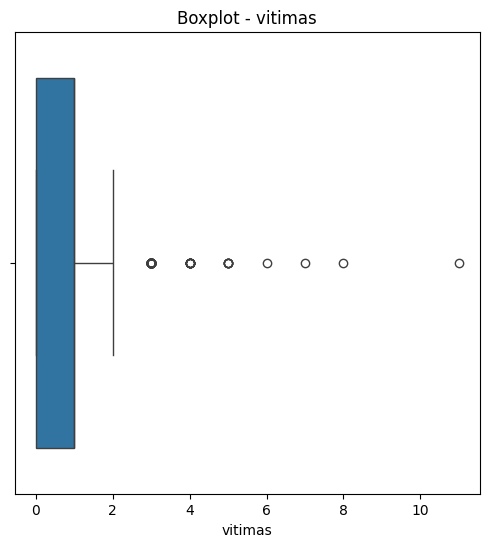

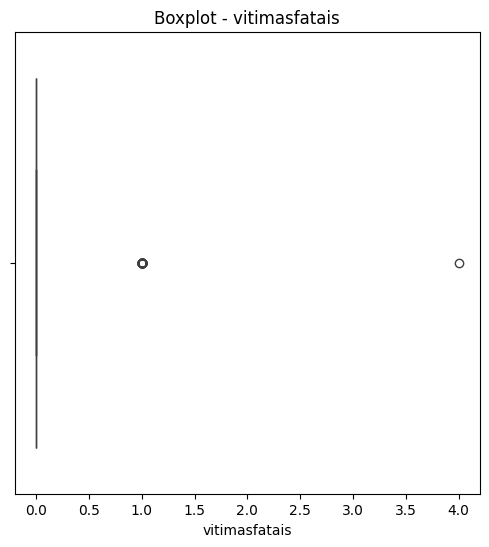

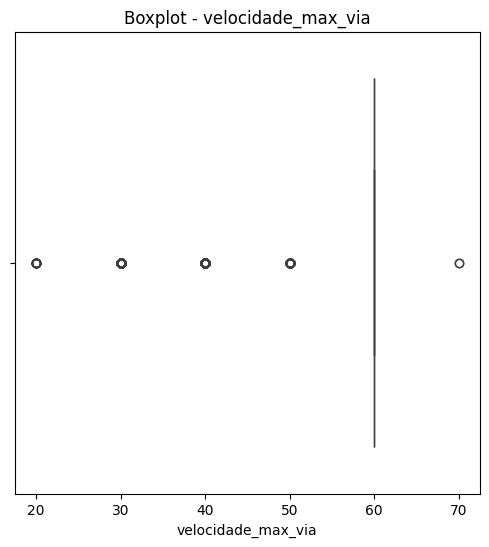

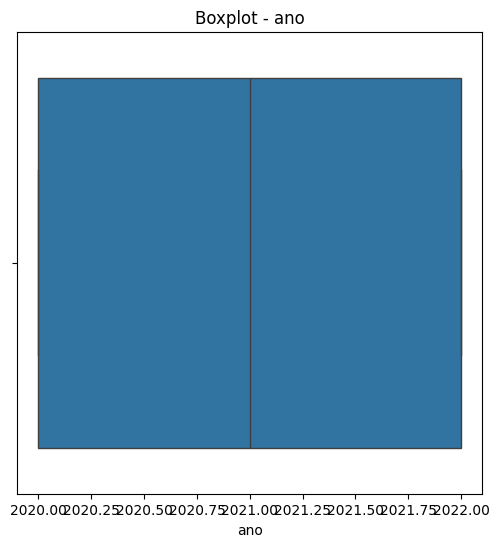

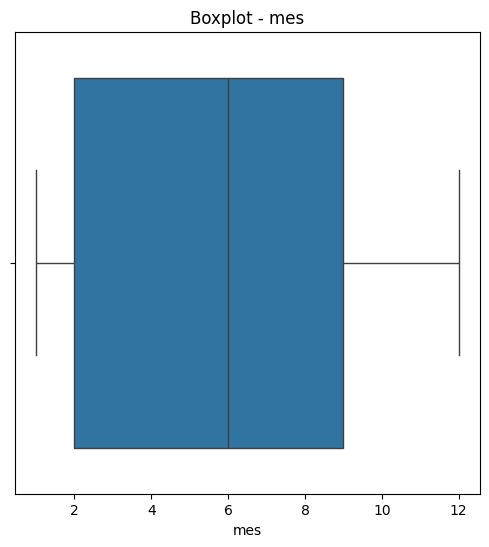

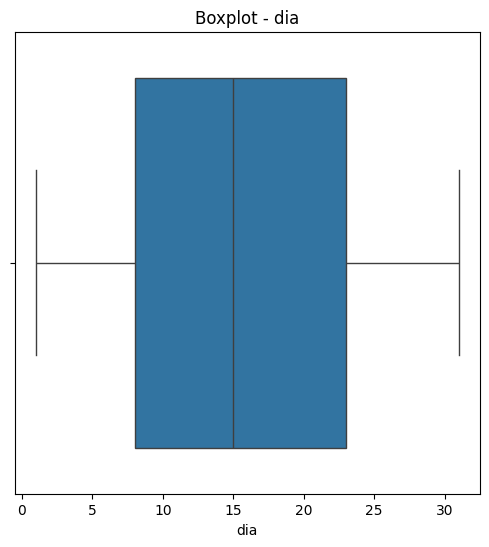

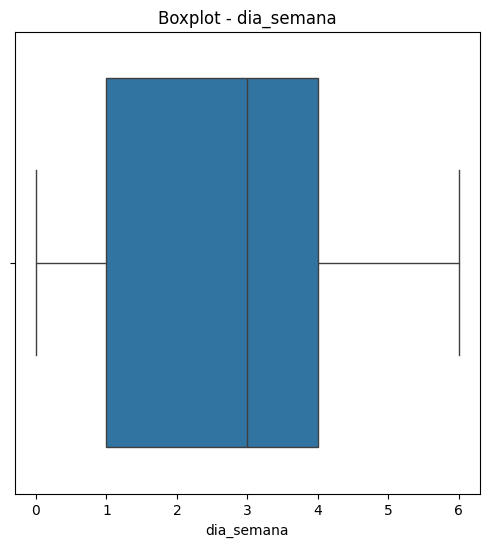

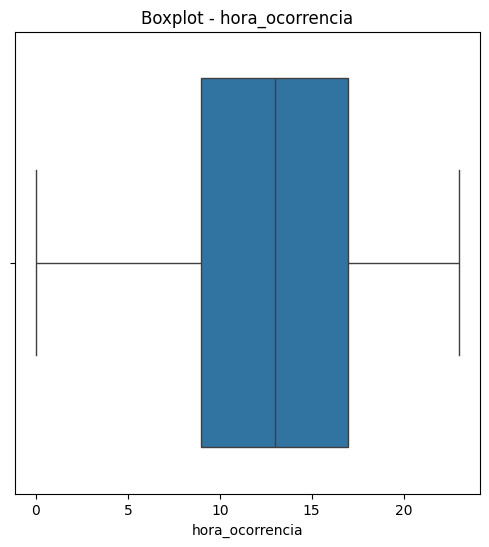

In [11]:
for coluna in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(6, 6))
  sns.boxplot(x=df[coluna])
  plt.title(f'Boxplot - {coluna}')
  plt.show()

In [12]:
print('Verificando os dados estatísticos para ter uma melhor noção sobre o dataframe:\n')
df.describe()

Verificando os dados estatísticos para ter uma melhor noção sobre o dataframe:



,data,numero,num_semaforo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,velocidade_max_via,ano,mes,dia,dia_semana,hora_ocorrencia
count,9141,9.141000e+03,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,6472.000000
mean,2021-04-14 04:07:00.610436352,3.041820e+03,273.406356,1.127995,0.836014,0.005689,0.049995,0.060825,0.096817,0.057434,0.038508,0.011159,0.731430,0.007658,57.272727,2020.844328,5.816541,15.322612,2.732086,13.203337
min,2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2020.000000,1.000000,1.000000,0.000000,0.000000
25%,2020-03-13 00:00:00,4.650000e+02,265.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,2020.000000,2.000000,8.000000,1.000000,9.000000
50%,2021-03-16 00:00:00,5.580000e+02,265.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,60.000000,2021.000000,6.000000,15.000000,3.000000,13.000000
75%,2022-02-26 00:00:00,6.730000e+02,265.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,60.000000,2022.000000,9.000000,23.000000,4.000000,17.000000
max,2022-12-31 00:00:00,1.961199e+07,5631.000000,9.000000,4.000000,1.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000,11.000000,4.000000,70.000000,2022.000000,12.000000,31.000000,6.000000,23.000000
std,NaN,2.051229e+05,123.556395,0.715279,0.483783,0.075212,0.222418,0.257105,0.305550,0.237337,0.195251,0.109135,0.682355,0.094408,7.832415,0.845860,3.743782,8.694547,1.918837,5.064114


Identifiquei que a maioria das colunas numéricas possui valores coerentes, mas a coluna `num_semaforo` apresenta muitos valores discrepantes, possivelmente por erro nos dados ou falha no tratamento. Além disso a coluna `numero` tem um valor extremamente alto, provavelmente gerado por algum erro, podendo ser até de digitação. Porém essas duas colunas não serão utilizadas em minha análise e nem no modelo, então só irei dropar. Se fosse preciso tratar, provavelmente eu usaria o tratamento com IQR

In [13]:
df = df.drop(columns=['num_semaforo', 'numero'])

Analisando melhor o dataframe depois das colunas removidas e colunas tratadas, noto que posso seguir e tirar alguns insights sobre ele

###**Bairros com maior números de acidentes**

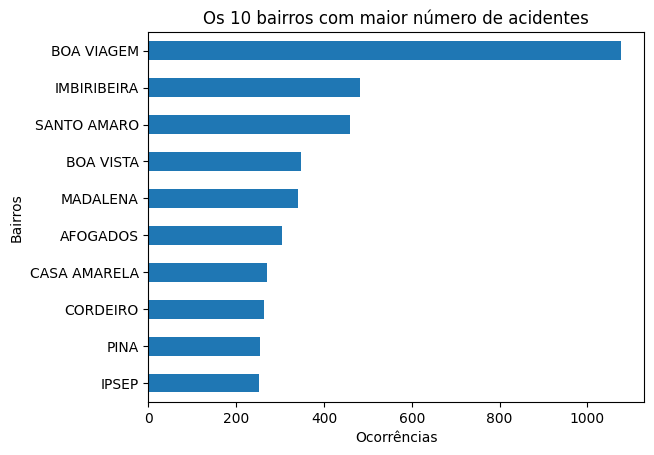

In [14]:
df['bairro'].value_counts().head(10)[::-1].plot(kind='barh')
plt.title('Os 10 bairros com maior número de acidentes')
plt.xlabel('Ocorrências')
plt.ylabel('Bairros')
plt.show()

Observando o gráfico, fica evidente que Boa Viagem se destaca significativamente, com mais de 1000 ocorrências, superando com folga os demais bairros no número de acidentes

###**Dia da semana e horários em que mais ocorrem acidentes**

**Dia da semana**

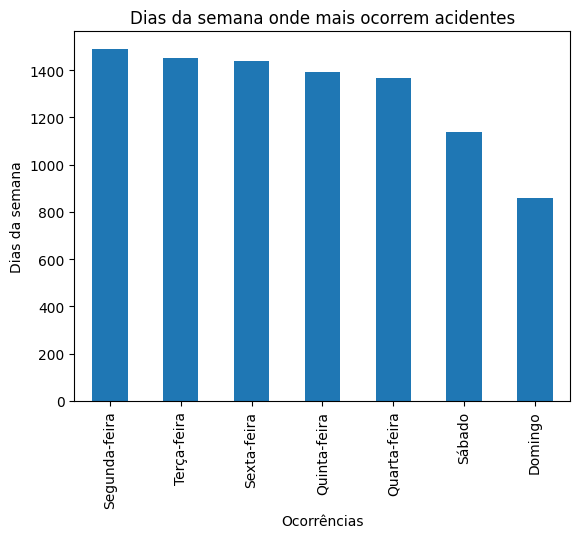

In [15]:
dias_pt = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df['data'].dt.day_name().map(dias_pt).value_counts().plot(kind='bar')
plt.title('Dias da semana onde mais ocorrem acidentes')
plt.xlabel('Ocorrências')
plt.ylabel('Dias da semana')
plt.show()

**Horarios**

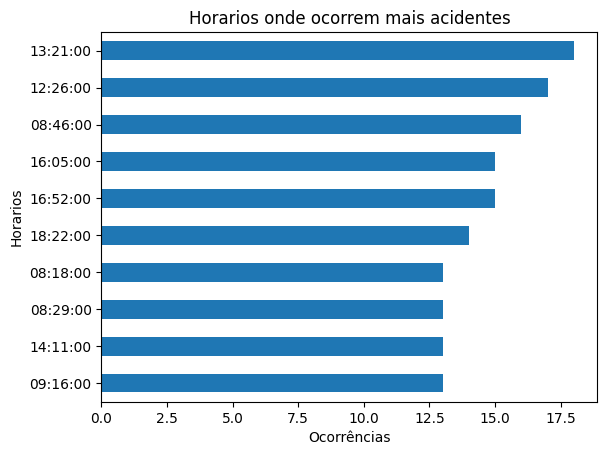

In [16]:
teste = df['hora'].value_counts().head(10)[::-1].plot(kind='barh')
plt.title('Horarios onde ocorrem mais acidentes')
plt.xlabel('Ocorrências')
plt.ylabel('Horarios')
plt.show()

A análise dos gráficos de acidentes por dia da semana e horário revela que as ocorrências se concentram principalmente entre segunda-feira e sexta-feira, Provavelmente por questõe de trabalho. Além disso, os acidentes tendem a ocorrer com maior frequência durante o período da tarde

###**Veículos com maior envolvimento em acidentes**

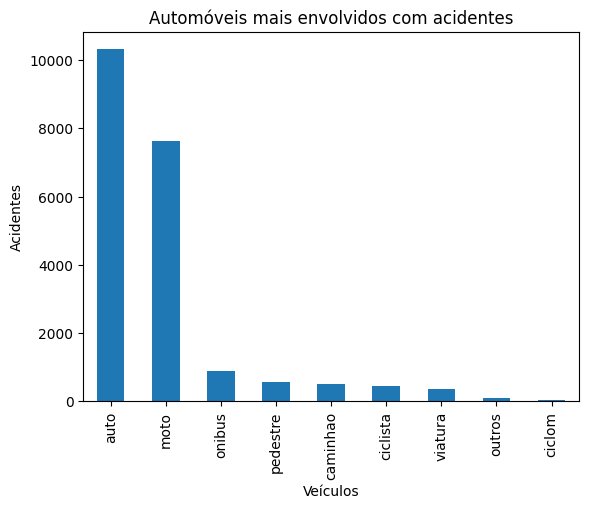

In [17]:
veiculos = ['auto','moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros']

df[veiculos].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Automóveis mais envolvidos com acidentes')
plt.xlabel('Veículos')
plt.ylabel('Acidentes')
plt.show()

A partir do gráfico, observa-se que os veículos mais frequentemente envolvidos em acidentes de trânsito são as motos e, principalmente, os carros. Os carros se destacam com uma quantidade de ocorrências significativamente superior em comparação aos demais, evidenciando um padrão preocupante

###**Total de número de vítimas fatais, e onde mais ocorreram**

In [18]:
bairros_mortes = df.groupby('bairro')['vitimasfatais'].sum()
bairros_morte = bairros_mortes.sort_values(ascending=False)
bairro_mais_mortes = bairros_morte.index[0]
qtd_mortes = bairros_morte.iloc[0]

print(f"Número total de mortos em acidentes: {df['vitimasfatais'].sum()}")
print(f"Bairro com mais mortes: {bairro_mais_mortes} ({qtd_mortes} mortes)")

Número total de mortos em acidentes: 70.0
Bairro com mais mortes: SANTO AMARO (5.0 mortes)


###**Maior quantidade acidentes por ano**

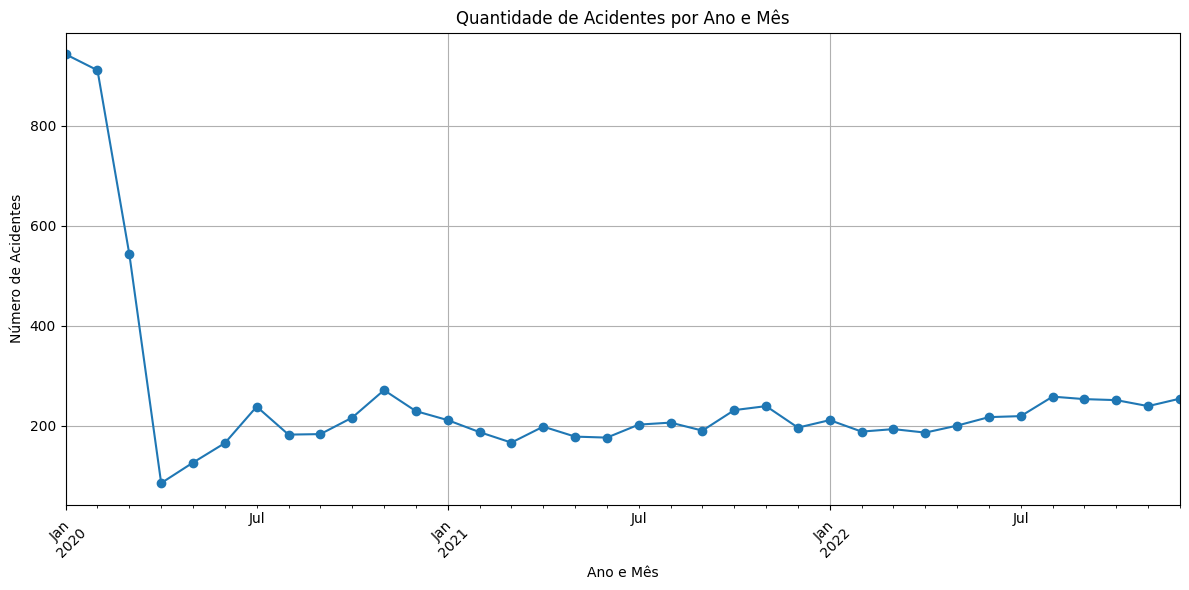

In [19]:
acidentes_ano_mes = df.groupby(['ano', 'mes']).size()
acidentes_ano_mes.index = pd.to_datetime(acidentes_ano_mes.index.map(lambda x: f'{x[0]}-{x[1]:02d}-01'))
acidentes_ano_mes = acidentes_ano_mes.sort_index()

plt.figure(figsize=(12, 6))
acidentes_ano_mes.plot(kind='line', marker='o')
plt.title('Quantidade de Acidentes por Ano e Mês')
plt.xlabel('Ano e Mês')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

A partir de março de 2020, observamos uma queda expressiva no número de acidentes, muito provavelmente relacionada às medidas de isolamento social durante a pandemia de COVID-19. Nos meses seguintes, os acidentes permaneceram em um patamar mais baixo ao longo de 2020 e 2021. Já em 2022, nota-se um leve aumento, indicando que a movimentação nas ruas foi voltando ao normal. Além disso, alguns picos ao longo do tempo sugerem uma possível influência de datas comemorativas, feriados ou maior fluxo de veículos em determinados períodos

In [34]:
df.to_csv('acidentes_2020-2022_tratado.csv', index=False) # Salvando o dataframe já tratado

#**Criando modelo para prever número de vítimas**

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
X = df.drop(['vitimasfatais', 'vitimas', 'endereco', 'complemento', 'bairro_cruzamento', 'bairro', 'hora', 'hora_ocorrencia', 'data', 'natureza',  'natureza_acidente', 'descricao', 'detalhe_endereco_acidente'], axis=1)
y = df['vitimas']

In [23]:
X.columns

Index(['situacao', 'sentido_via', 'tipo', 'auto', 'moto', 'ciclom', 'ciclista',
       'pedestre', 'onibus', 'caminhao', 'viatura', 'outros',
       'acidente_verificado', 'tempo_clima', 'situacao_semaforo',
       'sinalizacao', 'condicao_via', 'conservacao_via', 'ponto_controle',
       'situacao_placa', 'velocidade_max_via', 'mao_direcao', 'divisao_via1',
       'ano', 'mes', 'dia', 'dia_semana'],
      dtype='object')

In [24]:
colunas_categoricas = ['situacao', 'sentido_via', 'tipo', 'acidente_verificado', 'tempo_clima', 'situacao_semaforo', 'sinalizacao', 'condicao_via', 'conservacao_via', 'ponto_controle', 'situacao_placa', 'mao_direcao', 'divisao_via1']
colunas_numericas = ['auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros', 'velocidade_max_via', 'ano', 'mes', 'dia', 'dia_semana']

for col in colunas_categoricas:
    print(f"{col}: {X[col].nunique()} categorias únicas")

situacao: 9 categorias únicas
sentido_via: 104 categorias únicas
tipo: 31 categorias únicas
acidente_verificado: 8 categorias únicas
tempo_clima: 4 categorias únicas
situacao_semaforo: 6 categorias únicas
sinalizacao: 5 categorias únicas
condicao_via: 5 categorias únicas
conservacao_via: 5 categorias únicas
ponto_controle: 6 categorias únicas
situacao_placa: 31 categorias únicas
mao_direcao: 4 categorias únicas
divisao_via1: 9 categorias únicas


Ao analisar as colunas categóricas, observei que algumas delas possuem uma grande quantidade de categorias distintas. Aplicar **OneHotEncoding** nesses casos resultaria na criação de muitas colunas, o que poderia causar poluição no dataset e aumentar significativamente o custo computacional. Para lidar com isso de forma mais eficiente, irei utilizar **Frequency Encoding**, que mantém a dimensionalidade do conjunto de dados mais enxuta e ainda preserva uma representação útil das categorias. Nas outras colunas posso aplicar o **OneHot**

In [25]:
colunas_freq_encoding = ['sentido_via', 'tipo', 'situacao_placa']

for col in colunas_freq_encoding:
    freq_map = X[col].value_counts().to_dict()
    X[col] = X[col].map(freq_map)
    colunas_categoricas.remove(col)

X = pd.get_dummies(X, columns=colunas_categoricas, drop_first=True)
print('Codificação realizada com sucesso! Shape do X:\n', f'{df.shape[0]} linhas e {df.shape[1]} colunas')

Codificação realizada com sucesso! Shape do X:
 9141 linhas e 40 colunas


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
def avaliar_modelo(nome, modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\nModelo: {nome}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")

    return r2


Modelo: Random Forest
MAE: 0.30
RMSE: 0.48
R²: 0.48

Modelo: Ridge Regression
MAE: 0.39
RMSE: 0.52
R²: 0.38

Modelo: XGBoost
MAE: 0.32
RMSE: 0.48
R²: 0.49


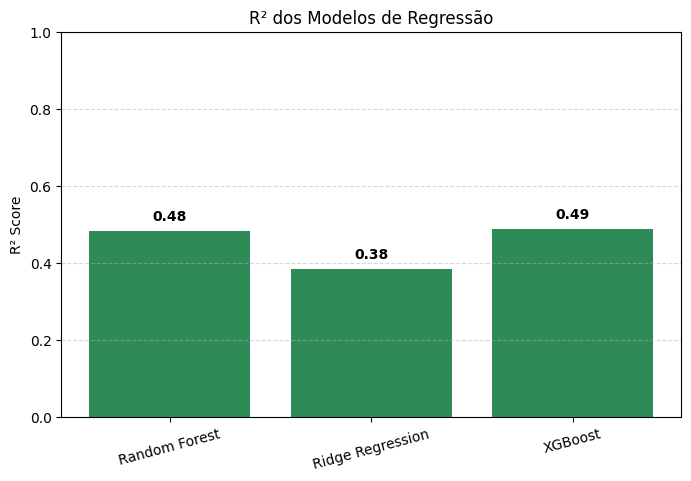

In [28]:
modelos = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge Regression': Ridge(),
    'XGBoost': XGBRegressor(random_state=42)
}

r2_scores = {}

for nome, modelo in modelos.items():
    r2 = avaliar_modelo(nome, modelo)
    r2_scores[nome] = r2

plt.figure(figsize=(8, 5))
bars = plt.bar(r2_scores.keys(), r2_scores.values(), color='seagreen')
plt.title('R² dos Modelos de Regressão')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=15)

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, altura + 0.02, f'{altura:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

Entre os três modelos avaliados, o `Ridge Regression` pode ser descartado por apresentar o pior desempenho em todas as métricas. Já o `Random Forest` e o `XGBoost` tiveram resultados semelhantes, mas o XGBoost se destaca por apresentar o maior R², indicando melhor capacidade de explicar a variabilidade dos dados. Por isso, ele é o mais adequado para prever a quantidade de vítimas em acidentes. Contudo, é importante observar que um R² de 49% ainda não representa um alto poder explicativo, o que limita a confiança total nas previsões do modelo. Por isso, optarei por seguir com o XGBoost e buscar melhorias por meio do ajuste de hiperparâmetros

###**XGBoost com ajuste de hiperparâmetros**

In [29]:
xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.01],
    'reg_lambda': [0.1, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Melhores parâmetros encontrados:", grid_search.best_params_)
melhor_modelo = grid_search.best_estimator_

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Melhores parâmetros encontrados: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.01, 'reg_lambda': 1.0, 'subsample': 1.0}


In [30]:
melhor_modelo = XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=1.0,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.01,
    reg_lambda=1.0,
    random_state=42
)

avaliar_modelo('XGBoost_otimizado', melhor_modelo)


Modelo: XGBoost_otimizado
MAE: 0.31
RMSE: 0.47
R²: 0.51


0.511463037116515

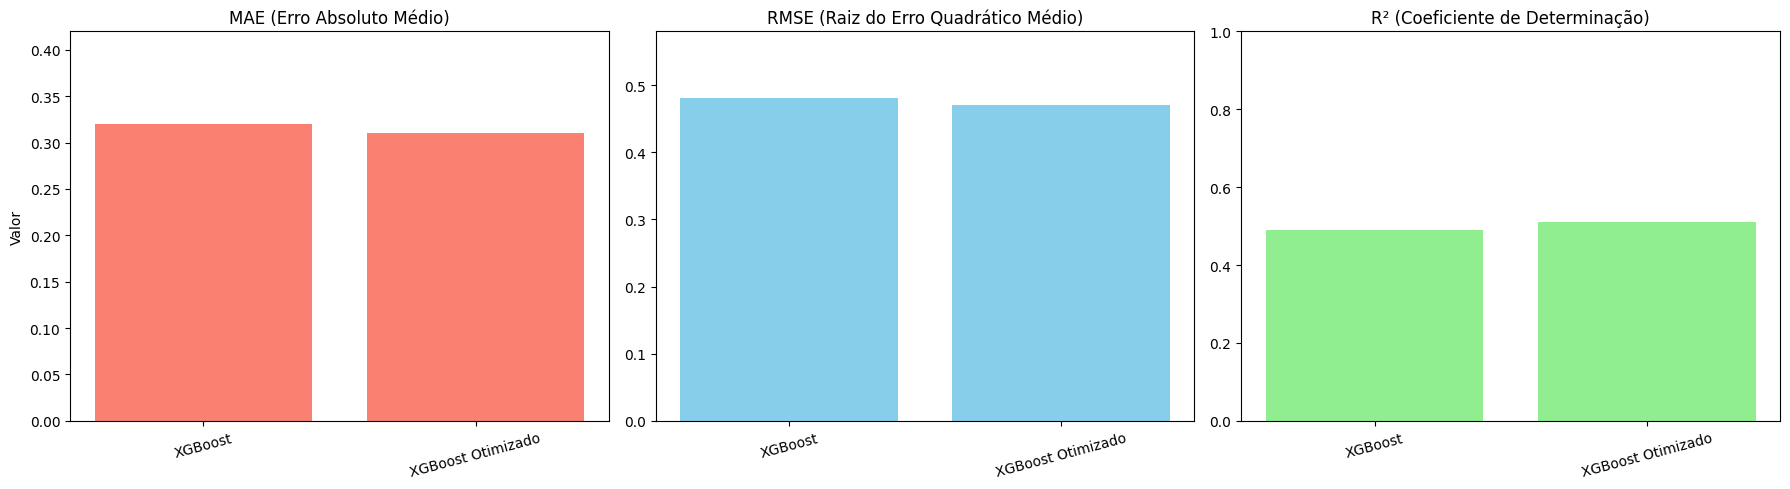

In [31]:
modelos = ['XGBoost', 'XGBoost Otimizado']
mae = [0.32, 0.31]
rmse = [0.48, 0.47]
r2 = [0.49, 0.51]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].bar(modelos, mae, color='salmon')
axs[0].set_title('MAE (Erro Absoluto Médio)')
axs[0].set_ylabel('Valor')
axs[0].set_ylim(0, max(mae) + 0.1)
axs[0].tick_params(axis='x', rotation=15)

axs[1].bar(modelos, rmse, color='skyblue')
axs[1].set_title('RMSE (Raiz do Erro Quadrático Médio)')
axs[1].set_ylim(0, max(rmse) + 0.1)
axs[1].tick_params(axis='x', rotation=15)

axs[2].bar(modelos, r2, color='lightgreen')
axs[2].set_title('R² (Coeficiente de Determinação)')
axs[2].set_ylim(0, 1)
axs[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

In [32]:
import joblib
joblib.dump(melhor_modelo, 'XGBRegression_model.pkl') # Salvando modelo

['XGBRegression_model.pkl']

Comparando o `XGBoost` com o `XGBoost Otimizado` (após ajuste de hiperparâmetros), é possível observar uma leve melhora no desempenho do modelo. Houve redução nos valores de MAE e RMSE, além de um aumento no R² de 49% para 51%. Apesar desse avanço, o R² ainda indica que o modelo explica apenas cerca de metade da variabilidade dos dados, o que limita sua confiabilidade para previsões futuras. Portanto, embora o ajuste tenha contribuído, ainda há espaço para melhorias na modelagem e nos dados utilizados

###**Observação!**
Após o treinamento dos modelos e a otimização dos hiperparâmetros do modelo com melhor desempenho (XGBoost), foi possível alcançar um coeficiente de determinação de aproximadamente 52%. É importante destacar que esse desempenho está diretamente relacionado à natureza da base de dados, que apresenta forte desbalanceamento na variável-alvo ‘vitimas’, com predominância dos valores 0 e 1, e uma quantidade significativamente menor de ocorrências para os demais valores



##**Desbalanceamento dos dados da categoria "vitimas"**

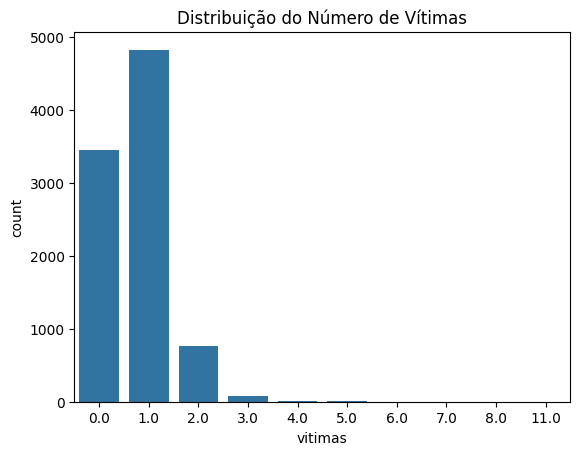

In [33]:
display(Markdown('##**Desbalanceamento dos dados da categoria "vitimas"**'))

sns.countplot(x=df['vitimas'])
plt.title('Distribuição do Número de Vítimas')
plt.show()

##**Fechamento**

O desbalanceamento presente na base de dados representou um desafio importante para o desenvolvimento do modelo, especialmente na previsão dos casos menos frequentes, o que impactou seu desempenho geral. Apesar disso, o modelo alcançou um R² em torno de 52%, um resultado positivo que indica a capacidade de explicar mais da metade da variabilidade dos dados.

Esse desempenho demonstra que o modelo conseguiu capturar padrões relevantes, mesmo diante das limitações impostas pela distribuição desigual das classes. Dessa forma, ele pode ser considerado uma ferramenta útil para apoiar análises preditivas e auxiliar na tomada de decisões em contextos similares, contribuindo para uma melhor compreensão dos fenômenos analisados